# **Exploração e análise de dados de crédito com SQL**

*Esse notebook faz parte do curso SQL para análise de dados da EBAC.*

## Os dados: 

Os dados representam informações de clientes de um banco e contam com as seguintes colunas: 

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m  = quantidade de transacoes dos ultimos 12 meses

A tabela foi criada no **AWS Athena** junto com o **S3 Bucket** com uma versão dos dados disponibilizados em: https://github.com/Matheus-Phillipe/Credit-EDA-and-Analysis---SQL


## **Exploração de dados:**

A primeira fase da análise é entender o que tem no nosso dataset. Para isso vamos realizar consultas para mostrar as variaveis que estao presentes e susas frequencias:

**Qual a quantidade de informações temos na nossa base de dados?**

Query: SELECT count(*) FROM credito
> Reposta: 2564 linhas

**Obs:** A base utilizada apresenta 2564 linhas 

**Como são os dados** 

Query: SELECT * FROM credito LIMIT 10;
![Dez primeiras linhas do dataset](https://github.com/Matheus-Phillipe/Credit-EDA-and-Analysis---SQL/blob/main/Count-10.png?raw=true)

> É possível reparar que existem algumas informações nulas na tabela (valor na), vamos olhar mais de perto para os valores de cada coluna! 

**Quais os tipos de cada dado**

**Query:** DESCRIBE credito

![Descrição dos tipos de dados](https://github.com/Matheus-Phillipe/Credit-EDA-and-Analysis---SQL/blob/main/Describe.png?raw=true)


Agora que ja entendemos quais são os tipos de dados, vamos conferir as proporções de cada variavel não numérica (String)

**Quais são os tipos de escolaridade e suas quantidades disponíveis no dataset?**

**Query:** select count(*) as quantidade, escolaridade from credito group by escolaridade

![Tipos de escolaridade](https://github.com/Matheus-Phillipe/Credit-EDA-and-Analysis---SQL/blob/main/EscolaridadeC.png?raw=true)

> É possivel perceber que a maioria das pessoas no dataset possui mestrado(810). Outro ponto bastante chamativo é que 346 dessas pessoas possuem dados faltantes.

Será que temos mais valores nulos?

**Quais são os tipos de estado_civil e suas quantidades disponíveis no dataset?**

**Query:** select count(*) as quantidade, estado_civil from credito group by estado_civil

![Tipos de estado civil](https://github.com/Matheus-Phillipe/Credit-EDA-and-Analysis---SQL/blob/main/Estado-civ-C.png?raw=true)

> A maioria das pessoas no dataset são casadas(1521) e ainda é possivel encontrar dados nulos(116).

**Quais são os tipos de salario e suas quantidades disponíveis no dataset?**

**Query:** Select count(*) as quantidade, salario_anual from credito group by salario_anual
           Order by salario_anual ASC

![Tipos de salario anual](https://github.com/Matheus-Phillipe/Credit-EDA-and-Analysis---SQL/blob/main/Salario-anual-C.png?raw=true)

> Os salários no dataset estão definidos por faixa salarial, sendo a faixa com maior quantidade a de pessoas que recebem menos de 40 mil anuais (701). Nessa coluna tambem é possivel observar dados faltantes(235).


**Quais são os tipos de cartão disponíveis e suas quantidades no dataset?**

**Query:** select count(*) as quantidade, tipo_cartao from credito group by tipo_cartao
           Order By quantidade ASC


![Tipos de cartão](https://github.com/Matheus-Phillipe/Credit-EDA-and-Analysis---SQL/blob/main/Tipo-car-C.png?raw=true)

> A maioria das pessoas possuem cartao do tipo blue(2453) e essa variavel não possui dados faltantes.

**Qual a proporção de clientes homens e mulheres no dataset?**

**Query:** select count(*) as quantidade, sexo from credito group by sexo

![QTD sexo](https://github.com/Matheus-Phillipe/Credit-EDA-and-Analysis---SQL/blob/main/sexo-C.png?raw=true)

> No dataset encontramos 1001 pesoas do sexo feminino e 1563 pessoas do sexo masculino.


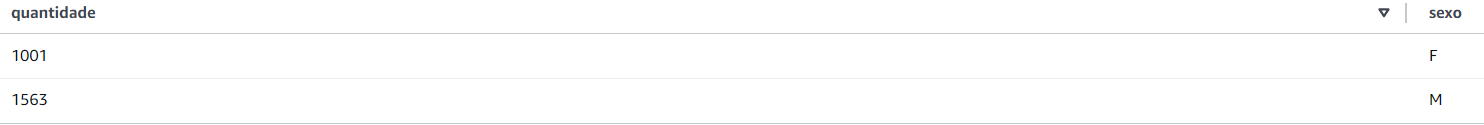
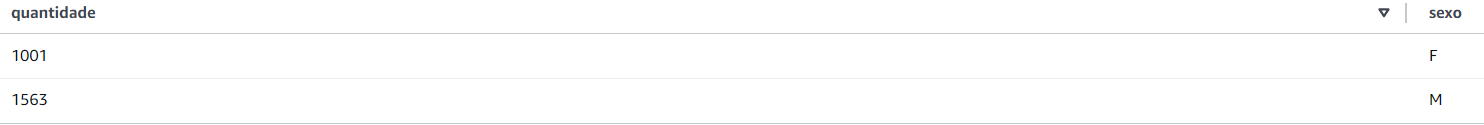

## **Análise de dados**

Após fazermos analises univariadas mostrando os tipos de cada variavel não numerica e sua frequencia, vamos partir paras as analises de dados bivariadas, onde acontece o cruzamento de duas variaveis. Começando com as perguntas:

**Nesse banco de dados, quantos clientes temos de cada faixa salarial agrupados por homens ou mulheres?**

**Query:** select count(*) as quantidade, salario_anual, sexo from credito group by salario_anual,sexo<br/>
           Order by salario_anual ASC

![Salario X sexo](https://github.com/Matheus-Phillipe/Credit-EDA-and-Analysis---SQL/blob/main/Salario-sexo-C.png?raw=true)

> Um dado importate que já é possivel observar: Apenas Homens possuem salario anual acima de 120 mil(222), na faixa de 80 a 120 mil (488) e na faixa de 60 a 80 mil (451). 
> De certa forma, já podemos concluir que nessa base de dados pessoas do sexo masculino ganham mais que pessoas do sexo feminino, uma vez que nao existe uma mulher sequer ganhando acima de 60 mil anual. 

**Ja que temos informações que homens recebem mais que as mulheres nesse dataset, será que os mesmos possuem um grau de escolaridade maior?**

**Query:** select count(*) as quantidade, escolaridade, sexo from credito group by escolaridade,sexo<br/>
Order by escolaridade ASC


![Escolaridade X sexo](https://github.com/Matheus-Phillipe/Credit-EDA-and-Analysis---SQL/blob/main/Escolar-sexo-C.png?raw=true)

> Como na base a maioria dos clientes são homens, apenas com o retorno dessa querry fica inviavel tirar alguma conclusão, sendo necessário realizar uma nova querry baseado nas devidas proporcões.

**Qual a proporção de homens e mulheres por sua escolaridade? (lembrando que temos 1563 pessoas do sexo masculino e 1001 do sexo feminino).**

> Primeiro para o sexo femino:

**Query:** select count(*) as quantidade, escolaridade, cast(round((count(*)*100.00) /(1001),2) AS DECIMAL(5,2)) as proporcao from credito<br/>
           Where sexo = 'F'<br/>
           Group by escolaridade<br/>
           Order by escolaridade ASC

![Escolaridade X sexo(F)](https://github.com/Matheus-Phillipe/Credit-EDA-and-Analysis---SQL/blob/main/prop-sex-esc-F.png?raw=true)

> Agora para o sexo masculino:

**Query:** select count(*) as quantidade, escolaridade, cast(round((count(*)*100.00) /(1563),2) AS DECIMAL(5,2)) as proporcao from credito<br/>
           Where sexo = 'M'<br/>
           Group by escolaridade<br/>
           Order by escolaridade ASC

![Escolaridade X sexo(M)](https://github.com/Matheus-Phillipe/Credit-EDA-and-Analysis---SQL/blob/main/prop-sex-esc-M.png?raw=true)

> Após a comparação das duas querries não foi possivel tirar uma conclusão definitiva, já que o a proporção de mulheres em cada escolaridade é bem proxima da proporção da escolaridade dos homens. O que deixa evidente que não é a escolaridade o fator que vai impactar diretamente no quanto cada pessoa ganha quando comparamos os sexos.

**Qual a maior, menor e a media do valor das transações dos clientes por sexo?**

**Query:** Select min(valor_transacoes_12m) as transacao_minima, max(valor_transacoes_12m) as transacao_maxima, avg(valor_transacoes_12m) as trasacao_media, sexo from credito<br/>
           Group by sexo
           
![Valor transacoes](https://github.com/Matheus-Phillipe/Credit-EDA-and-Analysis---SQL/blob/main/transacoes-min-max-med.png?raw=true)

> Os valores minimos, maximos e medios de transações para os dois sexos são bem proximas, não chegando a uma conclsão sólida, mas será que a quantidade de transações no ano tambem irão apresentar o mesmo padrão?

**Quantidade de transações no ano por cada sexo?**

**Query:** Select sum(qtd_transacoes_12m) as qtd_transacoes_ano, sexo from credito<br/>
           Group by sexo

![qtd_transacoes](https://github.com/Matheus-Phillipe/Credit-EDA-and-Analysis---SQL/blob/main/qtd_transac_ano.png?raw=true)

> Já nessa querry é possivel quer que os homens realizaram 22.278 transações a mais que as mulheres.<br/>
> Homens (64604)<br/>
> Mulheres (42326)<br/>
> O que nos leva a pensar:

**Qual o valor total movimentado por homens e mulheres no ano?**

**Query:** Select sum(valor_transacoes_12m) as valor_transacoes_ano, sexo from credito
           Group by sexo

![Valor_transacoes](https://github.com/Matheus-Phillipe/Credit-EDA-and-Analysis---SQL/blob/main/valor-total-transc.png?raw=true)

> Agora é possivel concluir que apesar das mulheres realizarem transacoes de valores proximos dos homens, o volume de transacoes dos homens é tão superior que o valor total de transações acumulam quase 1 milhão de reais.<br/>
> Homens =2.825.854,0<br/>
> Mulheres =1.841462,1<br/>
> Diferença = 984.392,1

**O salário impacta no limite?**

**Query:** select avg(limite_credito) as media_limite,  sexo,   salario_anual from credito 
where salario_anual != 'na'
group by sexo, salario_anual
order by avg(limite_credito) desc

![Valor salario_anualLimite](https://github.com/Matheus-Phillipe/Credit-EDA-and-Analysis---SQL/blob/main/Limite_salario.png?raw=true)

>SIM! As pessoas que tem menor faixa salarial também apresentam menor limite de credito! Quanto maior o salario maior a media do limite de credito.


# Conclusão

Essas foram **algumas** análises extraídas do dataset de crédito.  

Alguns insights interessantes:

- a maior parte dos clientes possui renda até 40K 
- a maior parte dos clientes é do sexo masculino!
- a escolaridade não parece influenciar no salario por sexo.
- quanto maior a faixa do salário, maior o limite.
- os clientes com maiores limites são em sua maioria homens, logo os maiores salários tambem. 
- nenhuma cliente do sexo feminino possui salário superior a 60 mil.
- o valor gasto em transações nao possui uma diferença entre homens e mulheres, porem como o volume de transações dos homens é muito superior, o valor gasto durante o ano tambem é maior.
- pelo ultimo ponto podemos afirmar, homens gastam mais que as mulheres.
- apesar da base de dados ter muitos clientes que recebem mais de 40 mil no ano, nao condiz com um tipo de cartao, já que a grande maioria utiliza cartoes do tipo blue.

**Somente pelos dados observados não foi possivel afirmar um motivo real das mulheres receberem menos que os homens, pode ser que faltam variaveis, ou pode indicar apenas um tipo de problema de separaçao por gênero dentro das empresas.**

